# K-means con metodos de aprendizaje

In [1]:
import numpy as np #para hacer calculos cientificos
import pandas as pd #analisis de datos
import matplotlib.pyplot as plt #creacion de graficos
from sklearn.cluster import KMeans

%matplotlib inline 

In [2]:
metodos_data = pd.read_csv("../datos_metodos.csv")

In [3]:
metodos_data = metodos_data.drop('Unnamed: 13',1)

In [4]:
metodos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nombre              96 non-null     object 
 1   Nua                 96 non-null     int64  
 2   Semestre            96 non-null     int64  
 3   Genero              96 non-null     object 
 4   Carrera             96 non-null     object 
 5   Materia             96 non-null     object 
 6   Elección            96 non-null     object 
 7   Tiempo de elección  96 non-null     int64  
 8   TiempoVideo         96 non-null     float64
 9   TiempoPDF           96 non-null     float64
 10  TiempoAudio         96 non-null     float64
 11  TiempoEjemplo       96 non-null     float64
 12  Fecha_hora          96 non-null     object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.9+ KB


In [5]:
R_metodos_data = metodos_data 
R_metodos_data=R_metodos_data.drop(['Nombre'], axis=1)
R_metodos_data=R_metodos_data.drop(['Nua'], axis=1)
R_metodos_data=R_metodos_data.drop(['Materia '], axis=1)
R_metodos_data=R_metodos_data.drop(['Fecha_hora'], axis=1)


In [6]:
R_metodos_data.head()

,Semestre,Genero,Carrera,Elección,Tiempo de elección,TiempoVideo,TiempoPDF,TiempoAudio,TiempoEjemplo
0,12,Hombre,LICE,video,6,0.584572,0.000000,0.696459,1.967743
1,12,Hombre,LICE,pdf,8,1.985114,0.530954,0.000000,2.158200
2,12,Hombre,LICE,video,8,1.830355,0.000000,0.000000,0.000000
3,12,Hombre,LICE,ejemplo,8,0.000000,2.714251,0.000000,2.304171
4,12,Hombre,LICE,video,11,0.953845,0.020006,0.301034,0.163310


In [7]:

genero= R_metodos_data.iloc[:, [1]] 
genero = genero.values

for x in range(96):
    if genero[x]=='Hombre':
        genero[x]=1
    else :
        genero[x]=0

carrera= R_metodos_data.iloc[:, [2]] 
carrera = carrera.values

for x in range(96):
    if carrera[x]=='LICE':
        carrera[x]=0
    if carrera[x]=='LISC':
        carrera[x]=1
    if carrera[x]=='LGE':
        carrera[x]=2
    if carrera[x]=='LEI':
        carrera[x]=3
        
eleccion= R_metodos_data.iloc[:, [3]] 
eleccion = eleccion.values

for x in range(96):
    if eleccion[x]=='video':
        eleccion[x]=0
    if eleccion[x]=='pdf':
        eleccion[x]=1
    if eleccion[x]=='audio':
        eleccion[x]=2
    if eleccion[x]=='ejemplo':
        eleccion[x]=3       
        
R_metodos_data.iloc[:, [1]] = genero
R_metodos_data.iloc[:, [2]] = carrera
R_metodos_data.iloc[:, [3]] = eleccion

R_metodos_data.head()

,Semestre,Genero,Carrera,Elección,Tiempo de elección,TiempoVideo,TiempoPDF,TiempoAudio,TiempoEjemplo
0,12,1,0,0,6,0.584572,0.000000,0.696459,1.967743
1,12,1,0,1,8,1.985114,0.530954,0.000000,2.158200
2,12,1,0,0,8,1.830355,0.000000,0.000000,0.000000
3,12,1,0,3,8,0.000000,2.714251,0.000000,2.304171
4,12,1,0,0,11,0.953845,0.020006,0.301034,0.163310


In [8]:
R_metodos_data.describe()

,Semestre,Genero,Carrera,Elección,Tiempo de elección,TiempoVideo,TiempoPDF,TiempoAudio,TiempoEjemplo
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,8.687500,0.562500,0.750000,1.302083,9.458333,0.929908,0.895798,0.636745,0.818571
std,1.904634,0.498682,0.753937,1.223625,5.411327,1.568451,1.068273,1.184790,1.207333
min,7.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,1.000000,1.000000,1.000000,9.000000,0.489150,0.602902,0.000000,0.515946
75%,10.250000,1.000000,1.000000,3.000000,11.000000,1.125752,1.426192,0.842861,1.184757
max,12.000000,1.000000,2.000000,3.000000,43.000000,8.875425,3.912428,8.229528,8.009899


## Normalizamos los valores de las caracteristicas

In [9]:
R_metodos_norm=(R_metodos_data-R_metodos_data.min())/(R_metodos_data.max()-R_metodos_data.min())
R_metodos_norm

,Semestre,Genero,Carrera,Elección,Tiempo de elección,TiempoVideo,TiempoPDF,TiempoAudio,TiempoEjemplo
0,1.0,1.0,0.0,0.000000,0.051282,0.065864,0.000000,0.084629,0.245664
1,1.0,1.0,0.0,0.333333,0.102564,0.223664,0.135710,0.000000,0.269442
2,1.0,1.0,0.0,0.000000,0.102564,0.206227,0.000000,0.000000,0.000000
3,1.0,1.0,0.0,1.000000,0.102564,0.000000,0.693751,0.000000,0.287665
4,1.0,1.0,0.0,0.000000,0.179487,0.107470,0.005113,0.036580,0.020389
...,...,...,...,...,...,...,...,...,...
91,0.0,0.0,0.0,0.000000,0.282051,0.241901,0.000000,0.000000,0.000000
92,0.0,0.0,0.0,1.000000,0.051282,0.000000,0.764931,0.000000,0.086528
93,0.0,0.0,0.0,1.000000,0.128205,0.000000,0.106014,0.000000,0.043289
94,0.0,0.0,0.0,0.666667,0.076923,0.000000,0.000000,0.033712,0.232386


In [10]:
R_metodos_norm.describe()

,Semestre,Genero,Carrera,Elección,Tiempo de elección,TiempoVideo,TiempoPDF,TiempoAudio,TiempoEjemplo
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.337500,0.562500,0.375000,0.434028,0.139957,0.104773,0.228962,0.077373,0.102195
std,0.380927,0.498682,0.376969,0.407875,0.138752,0.176718,0.273046,0.143968,0.150730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.051282,0.000000,0.000000,0.000000,0.000000
50%,0.200000,1.000000,0.500000,0.333333,0.128205,0.055113,0.154099,0.000000,0.064414
75%,0.650000,1.000000,0.500000,1.000000,0.179487,0.126839,0.364529,0.102419,0.147912
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Busqueda de la cantidad optima de clusters
Calculamos que tan similares son los individuos dentro de los clusters

In [11]:
wcss = [] #lista vacia para guardar los calculos

for i in range(1, 10): #Para crear diferente cantidades de agrupaciones
    kmeans = KMeans (n_clusters = i, max_iter = 300)
    kmeans.fit(R_metodos_norm)  #Aplico k-means a la base de datos
    wcss.append(kmeans.inertia_)

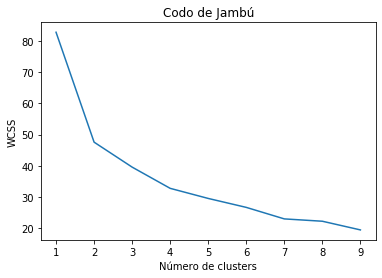

In [12]:
plt.plot(range(1,10), wcss)
plt.title("Codo de Jambú")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') #Wcss. Es un indicador de que tan similares son los individuos dentro de los clusters
plt.show()

In [13]:
clustering = KMeans(n_clusters = 3, max_iter= 300) #Crea el modelo
clustering.fit(R_metodos_norm) #Aplica el modelo a la base de datos

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
R_metodos_data['KMeans_Clusters'] = clustering.labels_ #los resultados del clustering se guardan en labels_ dentro del modelo 
R_metodos_data.head()

,Semestre,Genero,Carrera,Elección,Tiempo de elección,TiempoVideo,TiempoPDF,TiempoAudio,TiempoEjemplo,KMeans_Clusters
0,12,1,0,0,6,0.584572,0.000000,0.696459,1.967743,2
1,12,1,0,1,8,1.985114,0.530954,0.000000,2.158200,2
2,12,1,0,0,8,1.830355,0.000000,0.000000,0.000000,2
3,12,1,0,3,8,0.000000,2.714251,0.000000,2.304171,1
4,12,1,0,0,11,0.953845,0.020006,0.301034,0.163310,2


## Visualizamos los clusters que se formaron
Aplicaremos el analisis de componentes principales para darnos una idea de como se formaron los clustering

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #grafico de 2 dimenciones
pca_metodos = pca.fit_transform(R_metodos_norm)
pca_metodos_df = pd.DataFrame(data = pca_metodos, columns = ['Componente_1','Componente_2'])
pca_nombres_metodos = pd.concat ([pca_metodos_df, R_metodos_data[['KMeans_Clusters']]], axis=1)

pca_nombres_metodos

,Componente_1,Componente_2,KMeans_Clusters
0,-0.771302,-0.495562,2
1,-0.797244,-0.206622,2
2,-0.761887,-0.524882,2
3,-0.839583,0.409605,1
4,-0.765019,-0.516861,2
...,...,...,...
91,0.441767,-0.187438,0
92,0.374149,0.742329,0
93,0.324215,0.778910,0
94,0.352470,0.485230,0


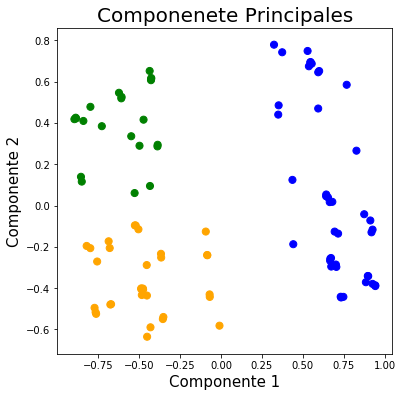

In [16]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1) #grafico dentro de la figura
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componenete Principales', fontsize = 20)

color_theme = np.array(['blue','green','orange'])
ax.scatter(x = pca_nombres_metodos.Componente_1, y = pca_nombres_metodos.Componente_2,
          c=color_theme[pca_nombres_metodos.KMeans_Clusters], s = 50)
plt.show() # No es necesario en jupyter per se agrega por si se usa un programa distinto

In [17]:
R_metodos_data.to_csv('datos_metodos_con_K-means.csv')

In [26]:
#Calculo la precisión del modelo
